Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed

import warnings
warnings.filterwarnings('ignore')

In [3]:
redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
redwine['type'] = 'red'
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [4]:
whitewine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
whitewine['type'] = 'white'
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
df = pd.concat([redwine, whitewine], axis = 0).reset_index(drop=True)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

In [10]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

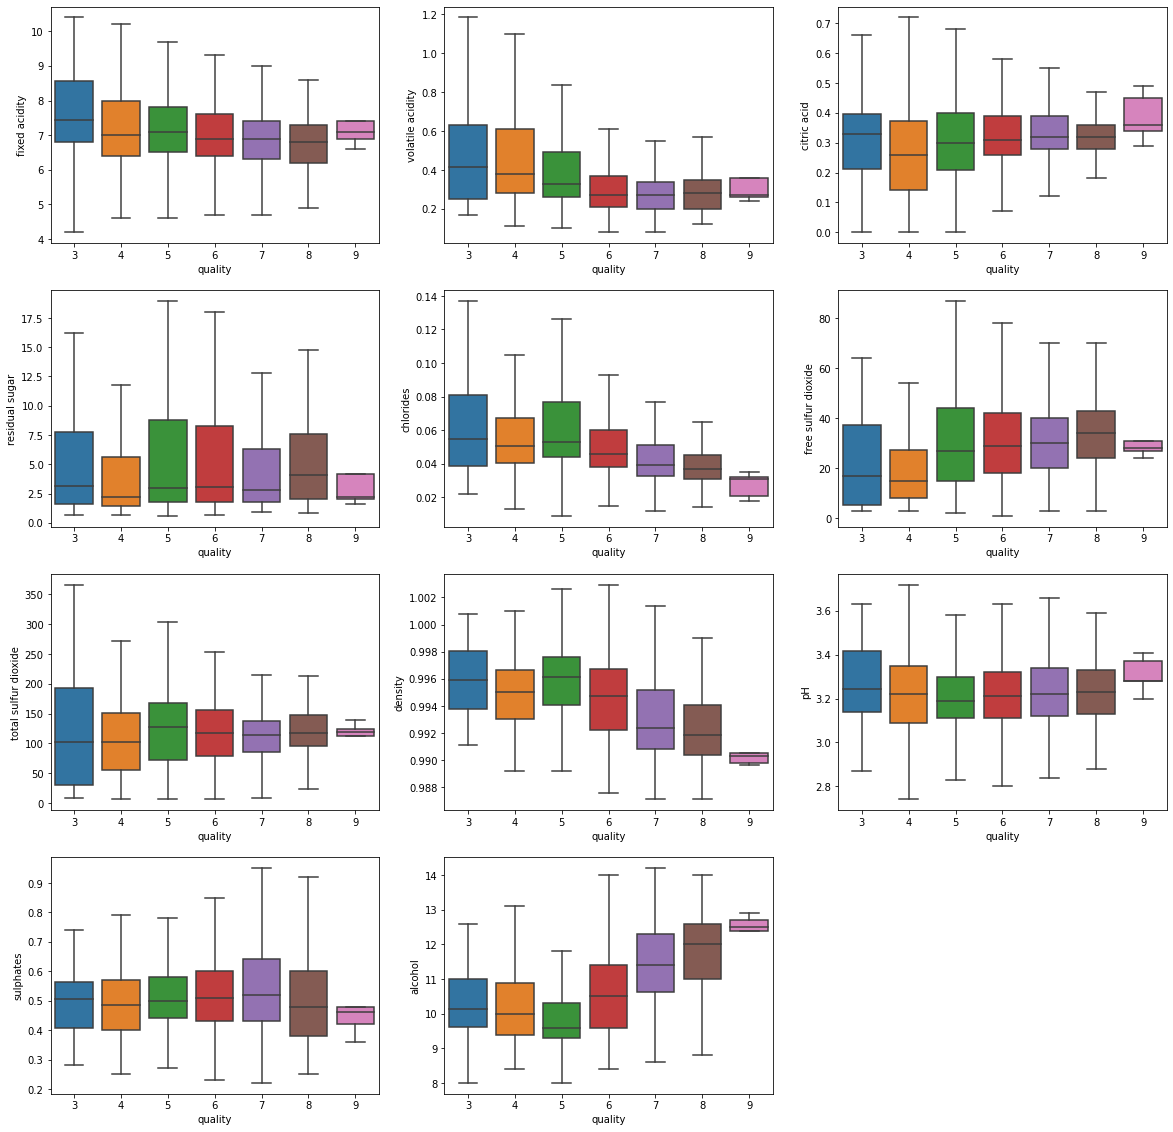

In [14]:
# Pair-wise Scatter Plots
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

fig = plt.figure(figsize = (20,20))

for i,col in enumerate(numeric_columns):
       ax = fig.add_subplot(4, 3, i+1)
       ax.set_xlabel("quality")
       ax.set_ylabel(col) 
       sns.boxplot(data= df, x='quality', y=col, showfliers=False)  
plt.show()

In [19]:
df['quality'] =  np.where(df.quality.isin([3,4]), '3-4', np.where(df.quality.isin([8,9]), '8-9', df.quality))
df['quality'] =  df.quality.astype('object')

In [16]:
df.quality.value_counts()

6      2836
5      2138
7      1079
3-4     246
8-9     198
Name: quality, dtype: int64

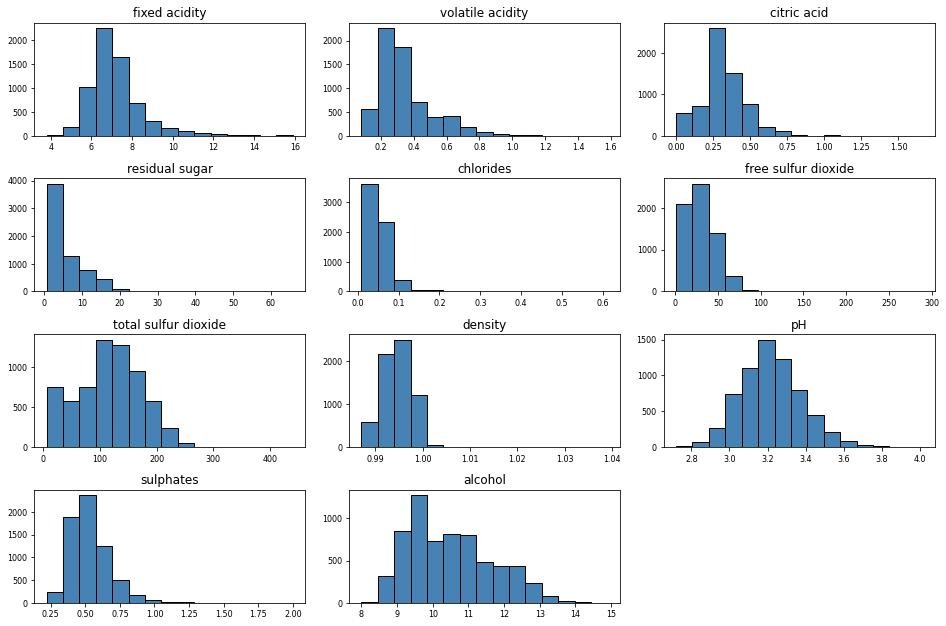

In [17]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
        xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))   

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [14]:
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

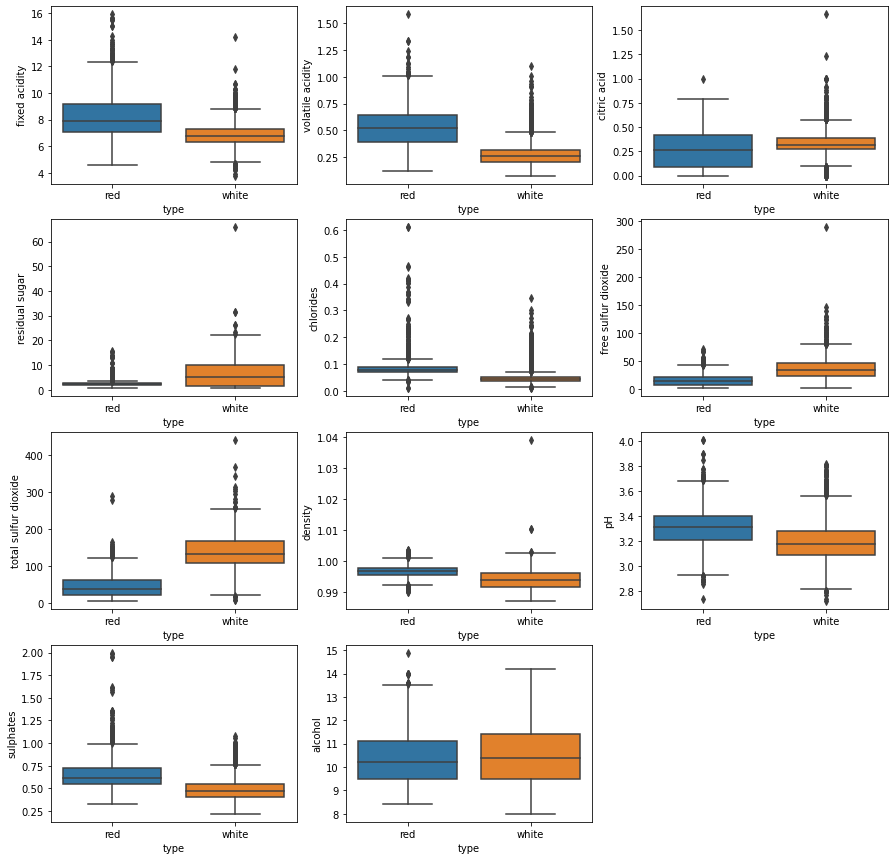

In [19]:


fig = plt.figure(figsize = (15,15))

for i,col in enumerate(numeric_columns):
       ax = fig.add_subplot(4, 3, i+1)
       ax.set_xlabel("wine type")
       ax.set_ylabel(col) 
       sns.boxplot(data= df, x='type', y=col)  
plt.show()

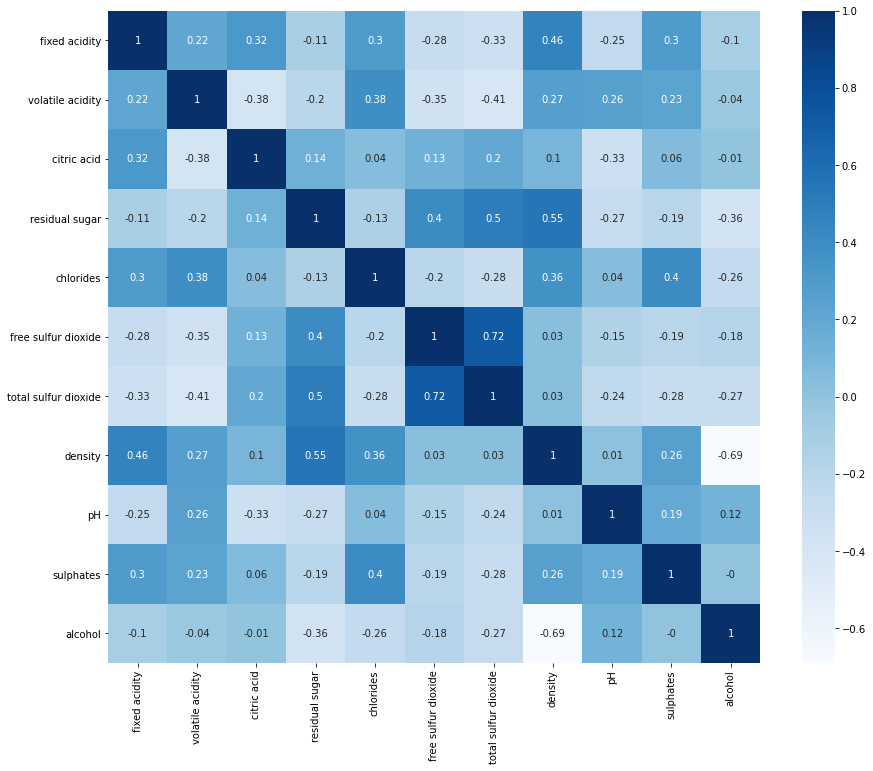

In [20]:
# Correlation Matrix Heatmap
plt.figure(figsize = (15,12))
corr = df.corr()
sns.heatmap(round(corr,2), annot=True,square=True, cmap="Blues")

plt.show()

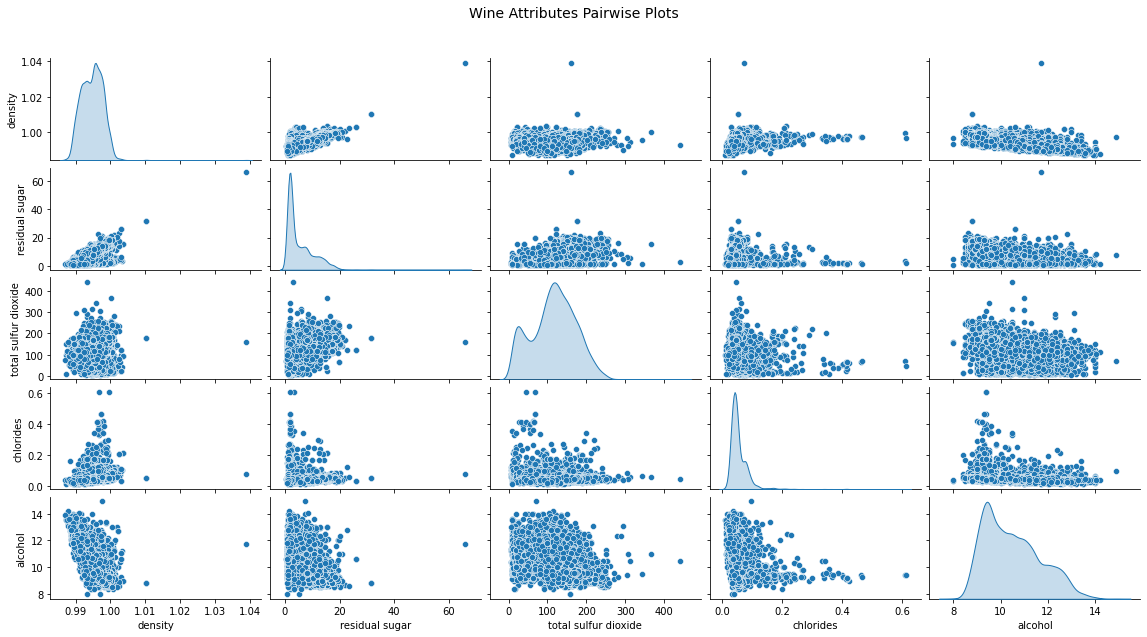

In [21]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide','chlorides', 'alcohol', 'quality']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  diag_kind="kde")

fig = pp.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

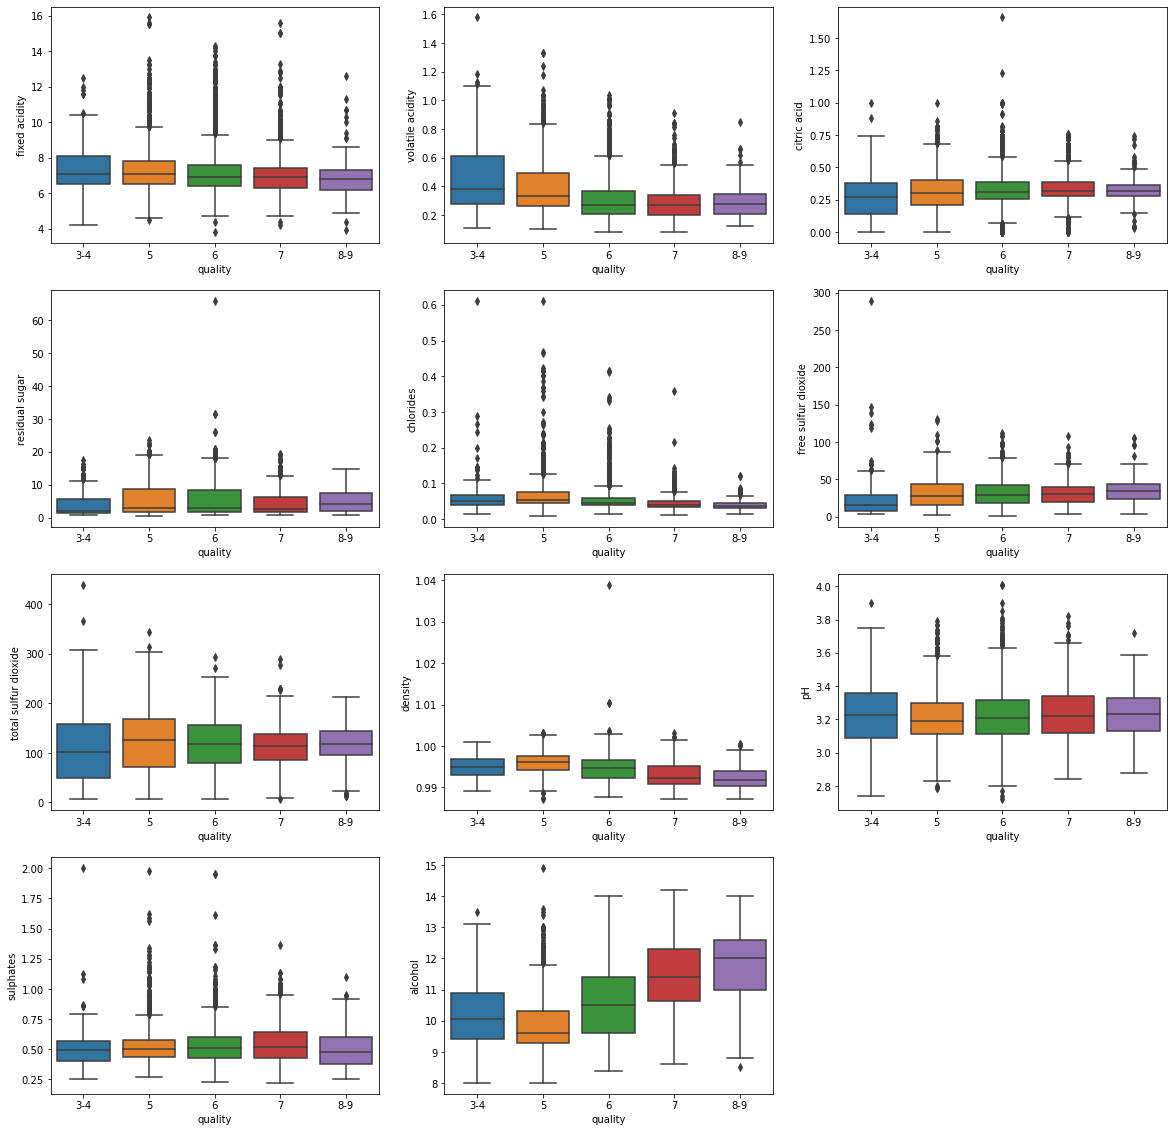

In [23]:
# Pair-wise Scatter Plots
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

fig = plt.figure(figsize = (20,20))

for i,col in enumerate(numeric_columns):
       ax = fig.add_subplot(4, 3, i+1)
       ax.set_xlabel("quality")
       ax.set_ylabel(col) 
       sns.boxplot(data= df, x='quality', y=col)  
plt.show()

## Build Model


In [11]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,GridSearchCV, KFold, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

import optuna
from collections import Counter

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from yellowbrick.classifier import ClassPredictionError
import joblib

import mlflow
from mlflow.tracking import MlflowClient
import warnings 
warnings.filterwarnings("ignore")


In [311]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality,
                                                    stratify=df.quality, 
                                                    test_size=0.3,
                                                    random_state=123)

In [312]:
for data in [X_train, X_test, y_train, y_test]:
    name =[x for x in globals() if globals()[x] is data][0]
    print(name, data.shape)

X_train (4547, 12)
X_test (1950, 12)
y_train (4547,)
y_test (1950,)


In [51]:
y_test.value_counts('rate')

6      0.436410
5      0.329231
7      0.166154
3-4    0.037949
8-9    0.030256
Name: quality, dtype: float64

In [52]:
y_train.value_counts('rate')

6      0.436552
5      0.329008
7      0.166044
3-4    0.037827
8-9    0.030570
Name: quality, dtype: float64

In [53]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [54]:
numeric_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [55]:

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', MinMaxScaler(), numeric_columns)], remainder='drop')),
    ('model', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

In [56]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  1  43  29   1   0]
 [  0 389 253   0   0]
 [  0 218 614  19   0]
 [  0  23 262  39   0]
 [  0   5  40  14   0]]
              precision    recall  f1-score   support

         3-4       1.00      0.01      0.03        74
           5       0.57      0.61      0.59       642
           6       0.51      0.72      0.60       851
           7       0.53      0.12      0.20       324
         8-9       0.00      0.00      0.00        59

    accuracy                           0.53      1950
   macro avg       0.52      0.29      0.28      1950
weighted avg       0.54      0.53      0.49      1950



By default, the LogisticRegression class uses the L2 penalty with a weighting of coefficients set to 1.0. 
The weighting of the coefficients in the penalty can be set via the “C” argument.

From the documentation:

    C : float, default=1.0
    Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

This means that values close to 1.0 indicate very little penalty and values close to zero indicate a strong penalty. A C value of 1.0 may indicate no penalty at all.

    C close to 1.0: Light penalty.
    C close to 0.0: Strong penalty.


In [57]:



param_dict = {
    'column_transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'model__C': [0, 0.0001, 0.001, 0.01, 0.1, 1.0]
    }

randsearch = GridSearchCV(pipe, param_dict, cv=5, scoring='accuracy',).fit(X_train, y_train)


In [58]:
print(randsearch.best_params_)

{'column_transformer__scaler': StandardScaler(), 'model__C': 0.1}


In [60]:

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), numeric_columns)], remainder='drop')),
    ('model', LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.1))])

In [61]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  1  44  28   1   0]
 [  1 390 249   2   0]
 [  0 215 608  28   0]
 [  0  23 234  67   0]
 [  0   5  41  13   0]]
              precision    recall  f1-score   support

         3-4       0.50      0.01      0.03        74
           5       0.58      0.61      0.59       642
           6       0.52      0.71      0.60       851
           7       0.60      0.21      0.31       324
         8-9       0.00      0.00      0.00        59

    accuracy                           0.55      1950
   macro avg       0.44      0.31      0.31      1950
weighted avg       0.54      0.55      0.51      1950



In [62]:
categorical_columns = ['type']

def create_pipeline(model, numeric_columns = numeric_columns, categorical_columns = categorical_columns, numeric_encoder = OneHotEncoder(), numeric_scaler=StandardScaler()):
        
        pipe = Pipeline([
        ('column_transformer', ColumnTransformer([
                ('one-hot', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('scaler', StandardScaler(), numeric_columns)], remainder='drop')),
        ('model', model)])
        
        return pipe




def model_results(model):
        pipe = create_pipeline(model)
        pipe.fit(X_train, y_train)
        pred=pipe.predict(X_test)
        
        #print("\033[1m","Model Name :",(str(model).split("(")[0]), "\033[0m" )
        print("Accuracy on training set :" , pipe.score(X_train, y_train))
        print("Accuracy on test set:", pipe.score(X_test, y_test))
        
        ax = plt.axes()
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, annot_kws={"size": 10}, cbar=False, fmt="d")
        ax.set_title(print("\033[1m"+ " Confusion Matrix ;"+"\033[0m"))
        plt.show()
        
        print(classification_report(y_test, pred))

        print(" ")
        
#preds = pd.DataFrame(pred,index = X_test.index, columns= ['predictions'])



 Model Name : GradientBoostingClassifier 
Accuracy on training set : 0.680668572685287
Accuracy on test set: 0.5820512820512821
 Confusion Matrix ;


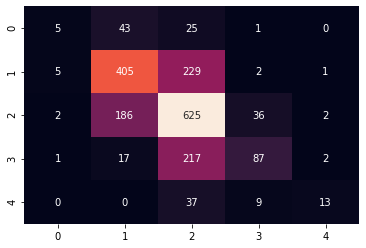

              precision    recall  f1-score   support

         3-4       0.38      0.07      0.11        74
           5       0.62      0.63      0.63       642
           6       0.55      0.73      0.63       851
           7       0.64      0.27      0.38       324
         8-9       0.72      0.22      0.34        59

    accuracy                           0.58      1950
   macro avg       0.59      0.38      0.42      1950
weighted avg       0.59      0.58      0.56      1950

 
 Model Name : LogisticRegression 
Accuracy on training set : 0.5451946338244996
Accuracy on test set: 0.536923076923077
 Confusion Matrix ;


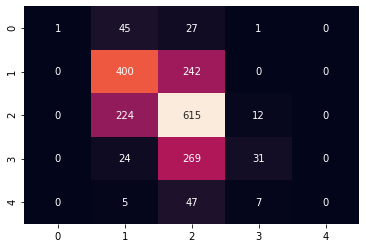

              precision    recall  f1-score   support

         3-4       1.00      0.01      0.03        74
           5       0.57      0.62      0.60       642
           6       0.51      0.72      0.60       851
           7       0.61      0.10      0.17       324
         8-9       0.00      0.00      0.00        59

    accuracy                           0.54      1950
   macro avg       0.54      0.29      0.28      1950
weighted avg       0.55      0.54      0.49      1950

 
 Model Name : AdaBoostClassifier 
Accuracy on training set : 0.5795029689905432
Accuracy on test set: 0.5461538461538461
 Confusion Matrix ;


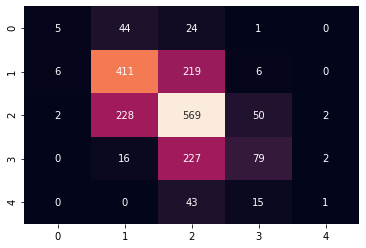

              precision    recall  f1-score   support

         3-4       0.38      0.07      0.11        74
           5       0.59      0.64      0.61       642
           6       0.53      0.67      0.59       851
           7       0.52      0.24      0.33       324
         8-9       0.20      0.02      0.03        59

    accuracy                           0.55      1950
   macro avg       0.44      0.33      0.34      1950
weighted avg       0.53      0.55      0.52      1950

 
 Model Name : RandomForestClassifier 
Accuracy on training set : 1.0
Accuracy on test set: 0.6753846153846154
 Confusion Matrix ;


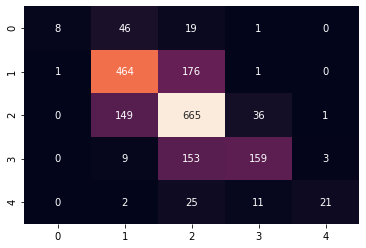

              precision    recall  f1-score   support

         3-4       0.89      0.11      0.19        74
           5       0.69      0.72      0.71       642
           6       0.64      0.78      0.70       851
           7       0.76      0.49      0.60       324
         8-9       0.84      0.36      0.50        59

    accuracy                           0.68      1950
   macro avg       0.77      0.49      0.54      1950
weighted avg       0.69      0.68      0.66      1950

 
 Model Name : XGBClassifier 
[19:06:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

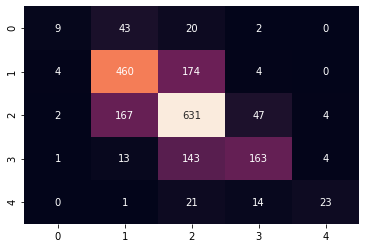

              precision    recall  f1-score   support

         3-4       0.56      0.12      0.20        74
           5       0.67      0.72      0.69       642
           6       0.64      0.74      0.69       851
           7       0.71      0.50      0.59       324
         8-9       0.74      0.39      0.51        59

    accuracy                           0.66      1950
   macro avg       0.66      0.49      0.54      1950
weighted avg       0.66      0.66      0.65      1950

 
 Model Name : MLPClassifier 
Accuracy on training set : 0.5779634924125797
Accuracy on test set: 0.5548717948717948
 Confusion Matrix ;


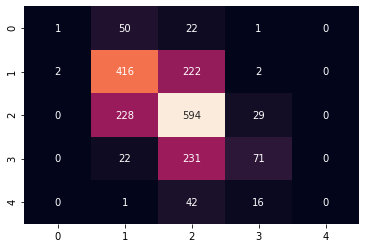

              precision    recall  f1-score   support

         3-4       0.33      0.01      0.03        74
           5       0.58      0.65      0.61       642
           6       0.53      0.70      0.61       851
           7       0.60      0.22      0.32       324
         8-9       0.00      0.00      0.00        59

    accuracy                           0.55      1950
   macro avg       0.41      0.32      0.31      1950
weighted avg       0.54      0.55      0.52      1950

 


In [125]:
models = (GradientBoostingClassifier(random_state= 123),LogisticRegression(random_state= 123),AdaBoostClassifier(random_state= 123),
                 RandomForestClassifier(random_state= 123), xgb.XGBClassifier(random_state= 123, eval_metric='logloss'), MLPClassifier(random_state= 123, max_iter=20))

for model in models:
    print("\033[1m","Model Name :",(str(model).split("(")[0]), "\033[0m" )
    model_results(OneVsRestClassifier(model))

In [64]:
df.quality.value_counts()

6      2836
5      2138
7      1079
3-4     246
8-9     198
Name: quality, dtype: int64

In [81]:

ct = ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), numeric_columns)], remainder='drop')

In [82]:

Counter(df.quality)

Counter({'5': 2138, '6': 2836, '7': 1079, '3-4': 246, '8-9': 198})

In [83]:
over = SMOTE(sampling_strategy={'5': 2138, '6': 2836, '7': 1079, '3-4': 500, '8-9': 500}, random_state=123)
X_train_transformed = ct.fit_transform(X_train,y_train)
X_test_transformed = ct.transform(X_test)
X_train_transformed, y_train_transformed = over.fit_resample(X_train_transformed, y_train)

In [88]:
model = OneVsRestClassifier(xgb.XGBClassifier(random_state= 123, eval_metric='logloss'))


In [90]:
model.fit(X_train_transformed, y_train_transformed)
preds = model.predict(X_test_transformed)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 13  43  16   2   0]
 [ 12 447 176   6   1]
 [  6 169 627  45   4]
 [  2  10 144 157  11]
 [  0   1  26   7  25]]
              precision    recall  f1-score   support

         3-4       0.39      0.18      0.24        74
           5       0.67      0.70      0.68       642
           6       0.63      0.74      0.68       851
           7       0.72      0.48      0.58       324
         8-9       0.61      0.42      0.50        59

    accuracy                           0.65      1950
   macro avg       0.61      0.50      0.54      1950
weighted avg       0.65      0.65      0.64      1950



In [40]:

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), numeric_columns)], remainder='drop')),
    ('model', OneVsRestClassifier(xgb.XGBClassifier(random_state= 123, eval_metric='logloss')))])

In [102]:
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  9  43  20   2   0]
 [  4 460 174   4   0]
 [  2 167 631  47   4]
 [  1  13 143 163   4]
 [  0   1  21  14  23]]
              precision    recall  f1-score   support

         3-4       0.56      0.12      0.20        74
           5       0.67      0.72      0.69       642
           6       0.64      0.74      0.69       851
           7       0.71      0.50      0.59       324
         8-9       0.74      0.39      0.51        59

    accuracy                           0.66      1950
   macro avg       0.66      0.49      0.54      1950
weighted avg       0.66      0.66      0.65      1950



In [117]:
def xgb_objective(trial, X, y, cv, scoring):
    params = {
        "min_split_loss": trial.suggest_int("min_split_loss", 0, 10, step=1),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "subsample": trial.suggest_float("subsample", 0.5, 1, step=0.1),
        "grow_policy": trial.suggest_categorical(
            "grow_policy", ["depthwise", "lossguide"]
        ),
        "objective": trial.suggest_categorical(
            "objective", ["binary:logistic", "binary:hinge"]
        ),
        "eval_metric" : "logloss",
        "random_state": 123,
        "n_iter_no_change": 10 # early stopping

    }
    # Perform CV
    
    model = OneVsRestClassifier(xgb.XGBClassifier(**params))
     
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Compute Score
    avg_score = scores["test_score"].mean()

    return avg_score

In [118]:
%%time

X = df.drop('quality', axis=1)
y=df.quality

pipe = ColumnTransformer([
    ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
    ('scaler', StandardScaler(), numeric_columns)], remainder='drop')
    
X= pipe.fit_transform(X) 

# Create study that maximize
study = optuna.create_study(direction="maximize")

kf = KFold(n_splits=5, shuffle=True, random_state=123)
# Pass additional arguments inside another function
func = lambda trial: xgb_objective(trial, X, y, cv=kf, scoring="accuracy")

# Start optimizing with 10 trials
study.optimize(func, n_trials=10)

[I 2022-09-09 17:15:37,131] A new study created in memory with name: no-name-3e0caf19-b53c-4b76-9bcd-05c4b4a49559
[I 2022-09-09 17:58:20,970] Trial 0 finished with value: 0.629833362941908 and parameters: {'n_estimators': 0, 'learning_rate': 0.014067114197414765, 'max_depth': 9, 'subsample': 0.6, 'grow_policy': 'depthwise', 'objective': 'binary:logistic'}. Best is trial 0 with value: 0.629833362941908.
[I 2022-09-09 18:12:26,040] Trial 1 finished with value: 0.5247040919050157 and parameters: {'n_estimators': 8, 'learning_rate': 0.014935928879351653, 'max_depth': 4, 'subsample': 0.6, 'grow_policy': 'lossguide', 'objective': 'binary:hinge'}. Best is trial 0 with value: 0.629833362941908.
[I 2022-09-09 18:31:53,481] Trial 2 finished with value: 0.5159329661870078 and parameters: {'n_estimators': 10, 'learning_rate': 0.025892073059573306, 'max_depth': 5, 'subsample': 0.8, 'grow_policy': 'lossguide', 'objective': 'binary:hinge'}. Best is trial 0 with value: 0.629833362941908.
[I 2022-09-09

KeyboardInterrupt: 

## Feature Selection 

In [205]:
%%time

X = df.drop('quality', axis=1)
y=df.quality

pipe = ColumnTransformer([
    ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
    ('scaler', StandardScaler(), numeric_columns)], remainder='drop')
    
X= pipe.fit_transform(X) 




# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 29.302  29.302  10.494 144.049  13.778  13.296  74.401  15.032  10.854
 204.528   2.52    6.371 480.668]
[[ 2.189  0.57   1.035 -0.915]
 [ 3.282  1.198  0.701 -0.58 ]
 [ 2.553  1.027  0.768 -0.58 ]
 [-0.362  0.541  1.102 -0.58 ]
 [ 2.189  0.57   1.035 -0.915]]
CPU times: user 22.4 ms, sys: 7.58 ms, total: 30 ms
Wall time: 28.1 ms


In [227]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[3,6,9,12]], df.quality,
                                                    stratify=df.quality, 
                                                    test_size=0.3,
                                                    random_state=123)

num_cols = X_train.drop('type', axis=1).columns

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), num_cols)], remainder='drop')),
    ('model', OneVsRestClassifier(xgb.XGBClassifier(random_state= 123, eval_metric='logloss')))])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  3  27  37   5   2]
 [  3 357 255  24   3]
 [  5 187 590  64   5]
 [  6  34 172 110   2]
 [  0   3  26   8  22]]
              precision    recall  f1-score   support

         3-4       0.18      0.04      0.07        74
           5       0.59      0.56      0.57       642
           6       0.55      0.69      0.61       851
           7       0.52      0.34      0.41       324
         8-9       0.65      0.37      0.47        59

    accuracy                           0.55      1950
   macro avg       0.50      0.40      0.43      1950
weighted avg       0.54      0.55      0.54      1950



In [65]:
df2 = df.copy()

df2['acidity_combined'] = df2['fixed acidity'] + df2['volatile acidity']
df2['free_total_sulfurdioxide_rate'] = df2['free sulfur dioxide'] / df2['total sulfur dioxide']

df2.drop(['fixed acidity','volatile acidity'], axis =1 , inplace=True)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('quality',axis=1), df2.quality,
                                                    stratify=df2.quality, 
                                                    test_size=0.3,
                                                    random_state=123)

num_cols = X_train.drop('type', axis=1).columns

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), num_cols)], remainder='drop')),
    ('model', OneVsRestClassifier(xgb.XGBClassifier(random_state= 123, eval_metric='logloss')))])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  6  48  18   2   0]
 [  8 459 169   5   1]
 [  1 177 620  53   0]
 [  0  17 134 167   6]
 [  1   2  25   9  22]]
              precision    recall  f1-score   support

         3-4       0.38      0.08      0.13        74
           5       0.65      0.71      0.68       642
           6       0.64      0.73      0.68       851
           7       0.71      0.52      0.60       324
         8-9       0.76      0.37      0.50        59

    accuracy                           0.65      1950
   macro avg       0.63      0.48      0.52      1950
weighted avg       0.65      0.65      0.64      1950



# Final Model


In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality,
                                                    stratify=df.quality, 
                                                    test_size=0.3,
                                                    random_state=123)

In [68]:

pipe = Pipeline([
    ('column_transformer', ColumnTransformer([
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), ['type']),
        ('scaler', StandardScaler(), numeric_columns)], remainder='drop')),
    ('model', OneVsRestClassifier(xgb.XGBClassifier(random_state= 123, eval_metric='logloss')))])

In [69]:
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[  9  43  20   2   0]
 [  4 460 174   4   0]
 [  2 167 631  47   4]
 [  1  13 143 163   4]
 [  0   1  21  14  23]]
              precision    recall  f1-score   support

         3-4       0.56      0.12      0.20        74
           5       0.67      0.72      0.69       642
           6       0.64      0.74      0.69       851
           7       0.71      0.50      0.59       324
         8-9       0.74      0.39      0.51        59

    accuracy                           0.66      1950
   macro avg       0.66      0.49      0.54      1950
weighted avg       0.66      0.66      0.65      1950



In [70]:


joblib.dump(pipe, 'pipeline.pkl')

['pipeline.pkl']

In [83]:
test = {'fixed acidity': 8, 'volatile acidity': 0.17, 'citric acid': 0.4, 'residual sugar': 1.5, 'chlorides': 0.05, 'free sulfur dioxide': 18, 
        'total sulfur dioxide': 50, 'density': 0.99, 'pH': 3.3, 'sulphates': 0.6, 'alcohol': 12, 'type': 'red'}

test = [test]
pipe.predict(pd.DataFrame(test))

array(['6'], dtype='<U3')

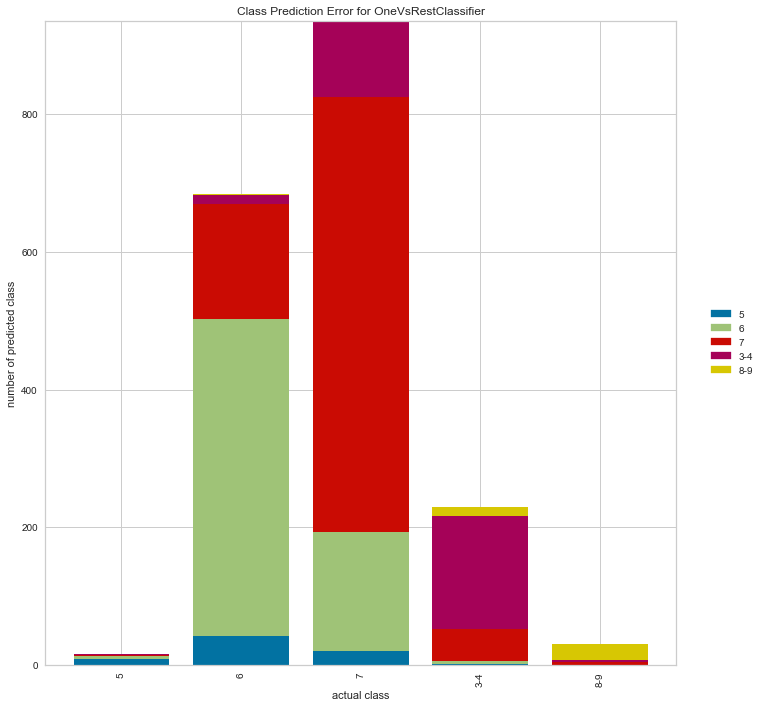

<AxesSubplot:title={'center':'Class Prediction Error for OneVsRestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [41]:

plt.figure(figsize=(12,10))
visualizer = ClassPredictionError(
    pipe, classes=list(df.quality.unique())
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [42]:
print(cohen_kappa_score(y_test, preds))

print(matthews_corrcoef(y_test, preds))

0.47025611652074295
0.47415760030817683


In [61]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
4926,5.8,0.170,0.36,1.3,0.036,11.0,70.0,0.992020,3.43,0.68,10.4,white
1180,8.2,0.350,0.33,2.4,0.076,11.0,47.0,0.995990,3.27,0.81,11.0,red
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.996920,3.29,0.67,10.0,red
1369,6.6,0.610,0.00,1.6,0.069,4.0,8.0,0.993960,3.33,0.37,10.4,red
5530,6.2,0.300,0.28,1.6,0.036,28.0,106.0,0.988245,3.14,0.41,13.3,white
...,...,...,...,...,...,...,...,...,...,...,...,...
2707,6.1,0.290,0.27,1.7,0.024,13.0,76.0,0.989300,3.21,0.51,12.6,white
503,10.5,0.260,0.47,1.9,0.078,6.0,24.0,0.997600,3.18,1.04,10.9,red
3838,6.9,0.440,0.42,8.5,0.048,10.0,147.0,0.997400,3.32,0.46,9.5,white
4016,7.3,0.815,0.09,11.4,0.044,45.0,204.0,0.997130,3.15,0.46,9.0,white


## Mlflow

In [52]:

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("wine_quality_clf")


INFO: 'wine_quality_clf' does not exist. Creating a new experiment


In [54]:
with mlflow.start_run():

    mlflow.set_tag("developer", "burcin")

    mlflow.log_artifact(local_path="xgb.bin", artifact_path="models_pickle")

In [55]:
def xgb_objective(trial, X_train, y_train, X_test, y_test):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")

        params = {
            "min_split_loss": trial.suggest_int("min_split_loss", 0, 10, step=1),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 9),
            "subsample": trial.suggest_float("subsample", 0.5, 1, step=0.1),
            "grow_policy": trial.suggest_categorical(
                "grow_policy", ["depthwise", "lossguide"]
            ),
            "objective": trial.suggest_categorical(
                "objective", ["binary:logistic", "binary:hinge"]
            ),
            "num_boost_round":20,
            "eval_metric" : "logloss",
            "random_state": 123,
            "n_iter_no_change": 10 # early stopping

        }
        # Perform CV
        mlflow.log_params(params)   
            
        model = OneVsRestClassifier(xgb.XGBClassifier(**params))
        
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        
        score = accuracy_score(y_test, preds)
        
        mlflow.log_metric("accuracy_score", score)
        
    return score

In [56]:
%%time

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Create study that maximize
study = optuna.create_study(direction="maximize")

func = lambda trial: xgb_objective(trial,X_train_transformed, y_train, X_test_transformed, y_test)

# Start optimizing with 10 trials
study.optimize(func, n_trials=10)

[03:18:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_iter_no_change, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_iter_no_change, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_iter_no_change, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  ver

In [50]:
study.best_params

{'min_split_loss': 0,
 'learning_rate': 0.00011634428100599493,
 'max_depth': 9,
 'subsample': 0.7,
 'grow_policy': 'lossguide',
 'objective': 'binary:logistic'}

In [51]:
study.best_value

0.6107692307692307